## Bağımlı İki Örneklem Testi

In [85]:
import pandas as pd
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,
                      119,121,118,124,121,125,115,115,119,118,121,117,117,120,
                      120,121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,
                       130,134,134,124,140,134,129,129,138,134,124,122,126,133,
                       127,130,130,130,132,117,130,125,129,133,120,127,123])

In [86]:
oncesi[0:5] #egitimden onceki performans degerleri

,0
0,123
1,119
2,119
3,116
4,123


In [87]:
sonrasi[0:5] #egitimden sonraki performans degerleri

,0
0,118
1,127
2,122
3,132
4,129


## BIRINCI VERI TIPI

In [88]:
AYRIK = pd.concat([oncesi,sonrasi], axis = 1) #veri isimleri yazilir.
AYRIK.columns = ["ONCESI","SONRASI"] # sütun isimleri yazılıyor
print("'AYRIK' Veri Seti: \n\n", AYRIK.head(),"\n\n")

'AYRIK' Veri Seti: 

    ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 




## IKINCI VERI TIPI__Burada yapılan verileri surekli olarak yukarıdan asagı yazıp ne olduklarını isaretliyoruz

In [89]:
import numpy as np
# ONCESI FLAG/TAG'INI OLUSTURMA
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"

# FLAG VE "ONCESI" DEGERLERINI BIR ARAYA GETIRME
A = pd.concat([oncesi, GRUP_ONCESI], axis = 1) #oncesi degerleri ve yanına 
#ONCESİ yazılıyor

# SONRASI FLAG/TAG'INI OLUSTURMA
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

#FLAG VE "SONRASI" DEGERLERINI BIR ARAYA GETIRME
B = pd.concat([sonrasi, GRUP_SONRASI], axis = 1) #sonrasi degerleri ve yanına 
#SONRASI yazılıyor 

#TUM VERIYI BIR ARAYA GETIRME
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

#ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS","ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti: \n\n",BIRLIKTE.head(),"\n")

'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



## Ikı farklı veri olusturma tipi asagıdadır.

In [90]:
print("'AYRIK' Veri Seti: \n\n", AYRIK.head(),"\n\n")
print("'BIRLIKTE' Veri Seti: \n\n",BIRLIKTE.head(),"\n")

'AYRIK' Veri Seti: 

    ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 


'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



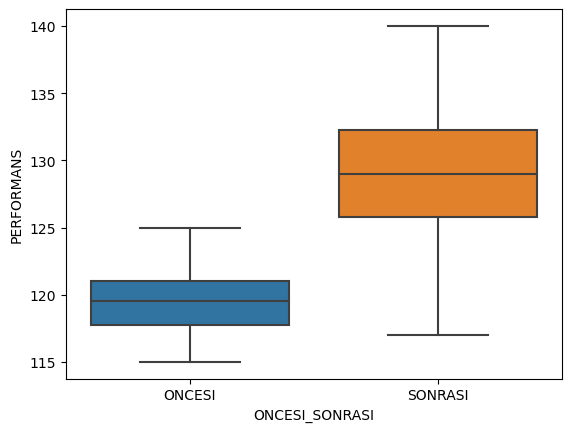

In [91]:
import seaborn as sns
sns.boxplot(x = "ONCESI_SONRASI", y = "PERFORMANS", data = BIRLIKTE);

Yukarı da var olan nokta. ONCESI'nın asagıda oldugunu osyluyor. Yani SONRASI'nın
medyanı daha yuksek. Bu cıkarım ile "egitimin etkisi vardır" Demek istatistiki
olarak dogru olmayabilir.

## NORMALLIK VARSAYIMI

In [92]:
from scipy.stats import shapiro

In [93]:
#shapiro(AYRIK.ONCESI)
print("T Hesap İstatistigi: " + str(shapiro(AYRIK.ONCESI)[0]))
print("P-Value: " + str(shapiro(AYRIK.ONCESI)[1]))

T Hesap İstatistigi: 0.9543651342391968
P-Value: 0.10722016543149948


P-Value < 0.05 DEGIL bundan dolayı H0 REDDEDİLEMEZ. Yani örnek ve teorik dagilimda fark yoktur.

In [94]:
#shapiro(AYRIK.SONRASI)
print("T Hesap İstatistigi: " + str(shapiro(AYRIK.SONRASI)[0]))
print("P-Value: " + str(shapiro(AYRIK.SONRASI)[1]))

T Hesap İstatistigi: 0.9780092239379883
P-Value: 0.6159630417823792


P-Value < 0.05 DEGİL bundan dolayı H0 REDDEDİLEMEZ. Yani örnek ve teorik dagilimda fark yoktur.

 Bırıncı varsayımımız ıkı grup ıcınde saglanmaktadır.

## VARYANS HOMOJENLIGI VARSAYIMI

H0: Varyanslar homojendir -----
H1: Varyanslar homojen degildir

In [95]:
from scipy.stats import levene
levene(AYRIK.ONCESI, AYRIK.SONRASI) #hıpotezı test ediyor. P-Value gore red veya degil

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

P-Value < 0.05 bundan dolayı H0 REDDEDİLİR. Varyanslar homojen degildir.

## Yapılacak şeyler şunlardır:
1) Veri seti uzerinde bazi aykiri degerler varsa bunlarla ilgili duzenlemeler yapilip varsayimlar tekrar incelenebilir.
2) Bir miktar gozardi edilebilen bir durumdur.

## BAGIMLI IKI ORNEKLEM TESTI UYGULAMASI

In [107]:
stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

In [101]:
test_istatistigi,pvalue = stats.ttest_rel(AYRIK["ONCESI"],AYRIK["SONRASI"])
print("Test İstatistigi = %.8f, p-degeri = %.8f" % (test_istatistigi,pvalue))

Test İstatistigi = -9.28153348, p-degeri = 0.00000000


P-Value < 0.05'dir. Farklilik olmadigini iddia edern H0 hipotezi reddedilir.
İstatistiki olarak Anlamli farklilik vardir. Yani egitimin Yigin ortalamasina etkisi olmustur

## Nonparametrik Bagımlı İki Orneklem Testi


Varsayalım ki varsayımlar bolumunde yer alan
- Normallik Varsayımı
- Varyans Homojenligi Varsayımı(zaten saglanmadı)
 saglanmadı:
 Wilcoxon() testi "Nonparametrik bagımlı iki orneklem testi"dir. 

In [104]:
stats.wilcoxon(AYRIK.ONCESI,AYRIK.SONRASI)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [106]:
test_istatistigi,pvalue = stats.wilcoxon(AYRIK["ONCESI"],AYRIK["SONRASI"])
print("Test İstatistigi = %.8f, p-degeri = %.8f" % (test_istatistigi,pvalue))

Test İstatistigi = 15.00000000, p-degeri = 0.00000025


P-Value <  0.05 oldugundan dolayi H0 REDDEDİLİR. Yani iki yigin arasinda istatistiki olarak anlamli bir farklilik gorunmektedir. Verilen egitim performansları etkilemistir.
Ortalamalarda olan farklilk hangi grubun lehine oldugu "boxplot"da bellidir.